In [1]:
# y = y_ref - y_pred
# エネルギー差を取得

import os.path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

from utils.constants.dir_path import DataDirPath
from utils.constants.constants import Constants
from descriptors.base_info import get_reindex_base

alpha-critobalite 1 1150
alpha-quartz 1151 2250
beta-quartz 2251 3050
beta-trydymite 3051 4300
coesite 4301 5500
Fdd2-beta-critobalite 5501 6850
hex-trydymite 6851 7850
stishovite 7851 8550
-573.1094183129725 4.123555895485392


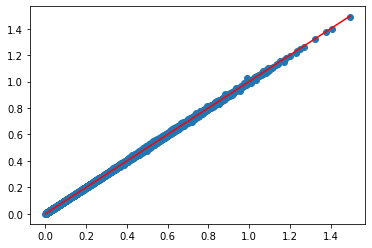

In [2]:
# dir_path = '/Users/y1u0d2/Desktop/Lab/result/nnp-train/rdf-inform/20211117'
dir_path = '/Users/y1u0d2/Desktop/Lab/result/nnp-train/20211126/scp/nnp-train_15_10'

epoch = 11
epoch = str(epoch).zfill(2)
base_df = get_reindex_base()
df_test = pd.read_csv(f'{dir_path}/analyze/testpoints.0000{epoch}.out.csv')
df_train = pd.read_csv(f'{dir_path}/analyze/trainpoints.0000{epoch}.out.csv')
df_test_new = pd.merge(df_test,base_df,left_on='index',right_on='structure_idx')
df_train_new = pd.merge(df_train,base_df,left_on='index',right_on='structure_idx')
df_concat = pd.concat([df_test_new, df_train_new])

norm_log_path = f'{dir_path}/analyze/input.nn'
with open(norm_log_path) as f:
    l_strip = [line.strip() for line in f.readlines()]
    l_strip = list(filter(None, l_strip))
    mean_arr = [line for line in l_strip if 'mean_energy' in line]
    norm_arr = [line for line in l_strip if 'conv_energy' in line]
for mean, norm in zip(mean_arr, norm_arr):
    mean = float(mean.split(' ')[-1])
    norm = float(norm.split(' ')[-1])
print(mean, norm)

df_concat['Ediff'] =df_concat.natom * 1/norm * (df_concat.Eref - df_concat.Ennp)
df_concat['E_nnp_from_norm'] = df_concat.natom * ((1/norm * df_concat.Ennp) + mean)
df_concat['E_ref_from_norm'] = df_concat.natom * ((1/norm * df_concat.Eref) + mean)
df_concat['E_ref_sio2'] = df_concat['E_ref_from_norm'] / (df_concat.natom)
df_concat['E_nnp_sio2'] = df_concat['E_nnp_from_norm'] / (df_concat.natom)
min_energy = df_concat['E_ref_sio2'].min()
df_concat['E_ref_sio2'] -= min_energy
df_concat['E_nnp_sio2'] -= min_energy
df_concat.sort_values('index', inplace=True)

xmin = 0
xmax = df_concat['E_ref_sio2'].max()
x = np.linspace(xmin, xmax, 100)
y = x
plt.plot(x,y, color='red')
plt.scatter(df_concat['E_ref_sio2'], df_concat['E_nnp_sio2'])

In [5]:
# dir_path = '/Users/y1u0d2/Desktop/Lab/result/nnp-train/rdf-inform/20211117'
dir_path = '/Users/y1u0d2/Desktop/Lab/result/nnp-train/20211126/scp/nnp-train_15_10'

epoch = 11
epoch = str(epoch).zfill(2)
base_df = get_reindex_base()
df_test = pd.read_csv(f'{dir_path}/analyze/testpoints.0000{epoch}.out.csv')
df_train = pd.read_csv(f'{dir_path}/analyze/trainpoints.0000{epoch}.out.csv')
df_test_new = pd.merge(df_test,base_df,left_on='index',right_on='structure_idx')
df_train_new = pd.merge(df_train,base_df,left_on='index',right_on='structure_idx')
df_concat = pd.concat([df_test_new, df_train_new])

norm_log_path = f'{dir_path}/analyze/input.nn'
with open(norm_log_path) as f:
    l_strip = [line.strip() for line in f.readlines()]
    l_strip = list(filter(None, l_strip))
    mean_arr = [line for line in l_strip if 'mean_energy' in line]
    norm_arr = [line for line in l_strip if 'conv_energy' in line]
for mean, norm in zip(mean_arr, norm_arr):
    mean = float(mean.split(' ')[-1])
    norm = float(norm.split(' ')[-1])
print(mean, norm)

df_concat['Ediff'] =df_concat.natom * 1/norm * (df_concat.Eref - df_concat.Ennp)
df_concat['E_nnp_from_norm'] = df_concat.natom * ((1/norm * df_concat.Ennp) + mean)
df_concat['E_ref_from_norm'] = df_concat.natom * ((1/norm * df_concat.Eref) + mean)
df_concat['E_ref_sio2'] = df_concat['E_ref_from_norm'] / (df_concat.natom)
df_concat['E_nnp_sio2'] = df_concat['E_nnp_from_norm'] / (df_concat.natom)
min_energy = df_concat['E_ref_sio2'].min()
df_concat['E_ref_sio2'] -= min_energy
df_concat['E_nnp_sio2'] -= min_energy
df_concat.sort_values('index', inplace=True)

xmin = 0
xmax = df_concat['E_ref_sio2'].max()
x = np.linspace(xmin, xmax, 100)
y = x
plt.plot(x,y, color='red')
plt.scatter(df_concat['E_ref_sio2'], df_concat['E_nnp_sio2'])


,index,Eref,Ennp
0,3,-1.174634,-1.173225
1,21,-0.560455,-0.559238
2,24,-0.495888,-0.498710
3,29,-0.409556,-0.412874
4,46,0.564804,0.567292
...,...,...,...
6786,8493,0.361557,0.352598
6787,8496,0.768813,0.795314
6788,8500,-0.967888,-0.964118
6789,8513,-0.812922,-0.806044


In [ ]:
input_data_path = f'{dir_path}/input.data'
index = 0
output_data = []
with open(input_data_path, 'r') as f:
   l_strip = [line.strip() for line in f.readlines()]
   for i, line in enumerate(l_strip):
       if 'energy' in  line.split(' '):
           energy = df_concat.loc[df_concat['index'] == index, 'Ediff'].item()
           line = f'energy {energy}'
           index += 1
       output_data.append(line)

In [109]:
with open(f'{dir_path}/angular/input.data', 'w') as f:
    f.write('\n'.join(output_data))